In [12]:
!pip install numpy pandas scikit-fuzzy matplotlib

In [13]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.read_csv('dataset_telur_rebus.csv')

# Tampilkan 5 baris awal
print("Dataset Telur Rebus:")
display(data.head())


Dataset Telur Rebus:


,time_min,water_temp_c,egg_size,doneness
0,13,78,medium,matang
1,4,80,medium,setengah matang
2,13,100,medium,matang
3,11,78,large,matang
4,3,78,medium,mentah


In [15]:
print("Informasi Dataset:")
print(data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time_min      60 non-null     int64 
 1   water_temp_c  60 non-null     int64 
 2   egg_size      60 non-null     object
 3   doneness      60 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.0+ KB
None


In [6]:
min_waktu = data['time_min'].min()
max_waktu = data['time_min'].max()
min_suhu = data['water_temp_c'].min()
max_suhu = data['water_temp_c'].max()

print(f"Rentang Waktu: {min_waktu} - {max_waktu} menit")
print(f"Rentang Suhu: {min_suhu} - {max_suhu} °C")


Rentang Waktu: 2 - 15 menit
Rentang Suhu: 78 - 102 °C


In [19]:
waktu = ctrl.Antecedent(np.arange(min_waktu, max_waktu + 1, 1), 'waktu')
suhu = ctrl.Antecedent(np.arange(min_suhu, max_suhu + 1, 1), 'suhu')
kematangan = ctrl.Consequent(np.arange(0, 11, 1), 'kematangan')


In [21]:


# Waktu (menit) - membership arrays eksplisit
w_sebentar = fuzz.trapmf(waktu.universe, [min_waktu, min_waktu, min_waktu + 2, min_waktu + 4])
w_sedang   = fuzz.trimf(waktu.universe, [min_waktu + 3, (min_waktu + max_waktu) / 2, max_waktu - 3])
w_lama     = fuzz.trapmf(waktu.universe, [max_waktu - 5, max_waktu - 2, max_waktu, max_waktu])

# Assign kembali ke objek Antecedent (biar kompatibel juga dengan ControlSystem)
waktu['sebentar'] = w_sebentar
waktu['sedang']   = w_sedang
waktu['lama']     = w_lama

# Suhu (°C) - membership arrays eksplisit
s_rendah = fuzz.trapmf(suhu.universe, [min_suhu, min_suhu, min_suhu + 5, (min_suhu + max_suhu) / 2 - 5])
s_sedang = fuzz.trimf(suhu.universe, [(min_suhu + max_suhu) / 2 - 10, (min_suhu + max_suhu) / 2, (min_suhu + max_suhu) / 2 + 10])
s_tinggi = fuzz.trapmf(suhu.universe, [(min_suhu + max_suhu) / 2 + 5, max_suhu - 5, max_suhu, max_suhu])

suhu['rendah'] = s_rendah
suhu['sedang'] = s_sedang
suhu['tinggi'] = s_tinggi

# Kematangan (0-10)
k_mentah   = fuzz.trapmf(kematangan.universe, [0, 0, 2, 4])
k_setengah = fuzz.trimf(kematangan.universe, [3, 5, 7])
k_matang   = fuzz.trapmf(kematangan.universe, [6, 8, 10, 10])

kematangan['mentah'] = k_mentah
kematangan['setengah'] = k_setengah
kematangan['matang'] = k_matang



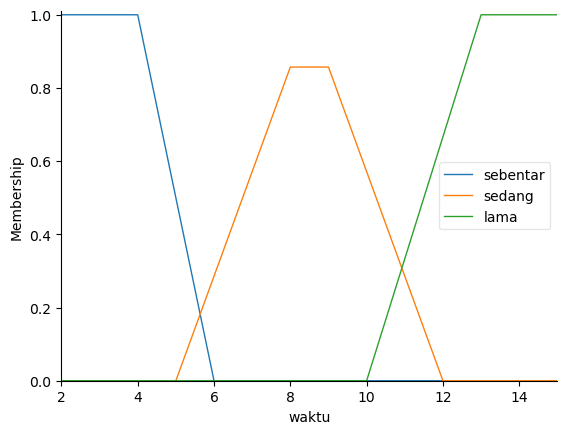

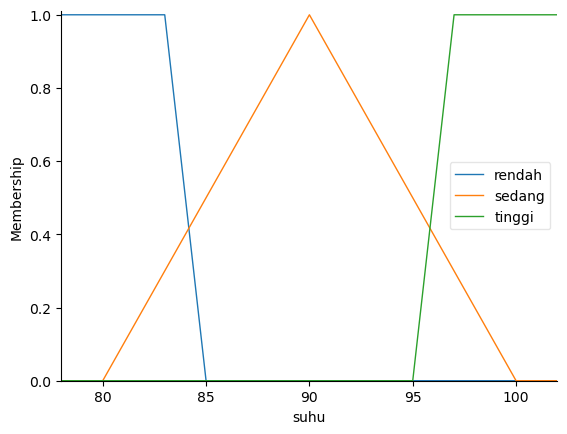

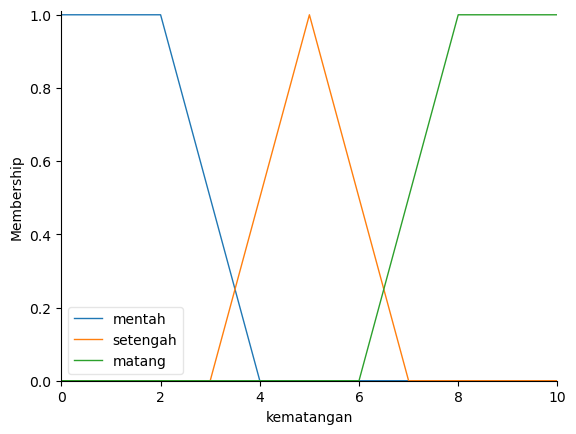

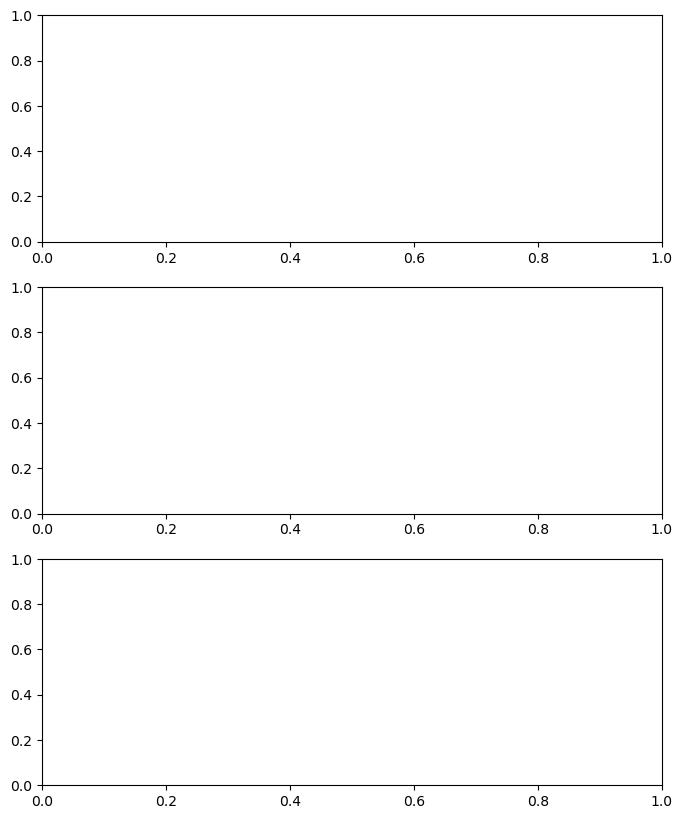

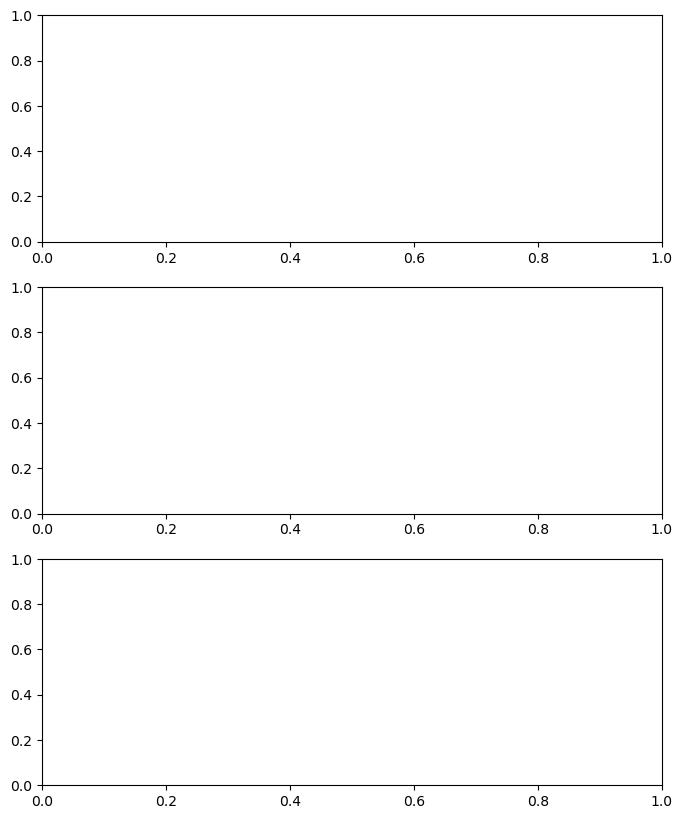

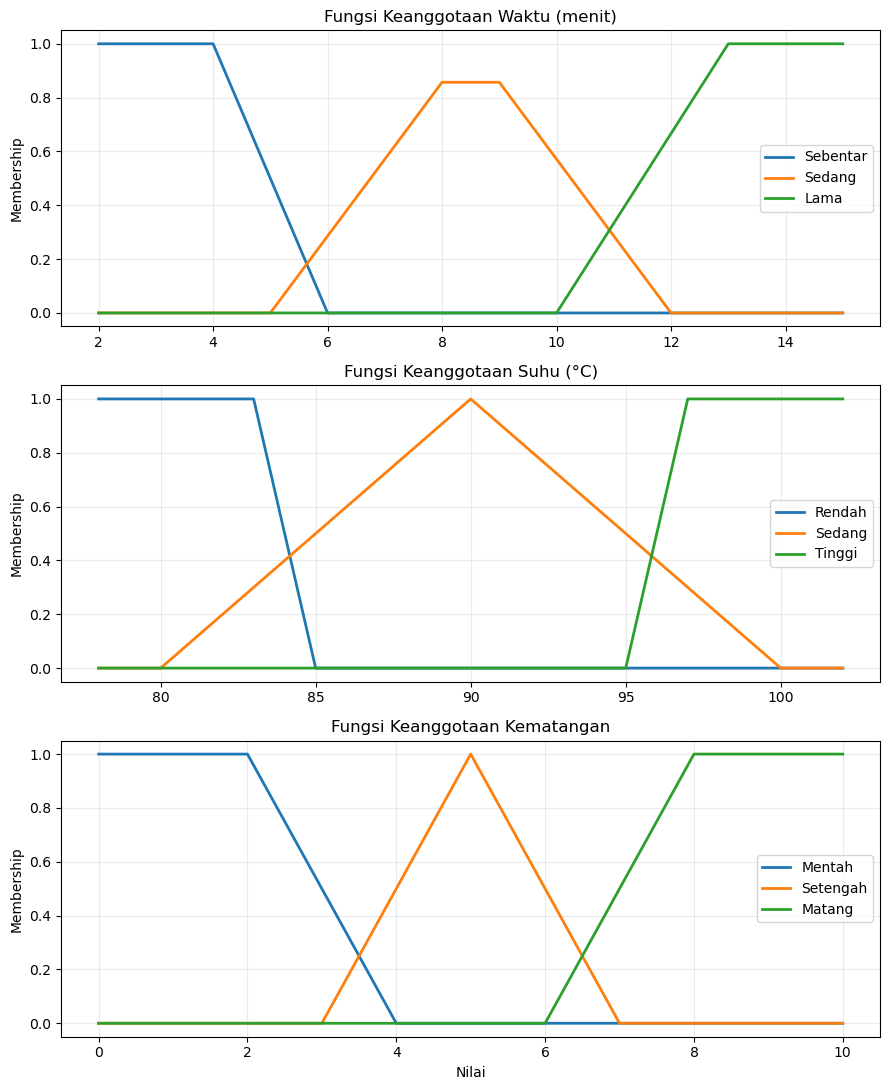

In [23]:
# CELL 8 - Plot membership functions menggunakan array eksplisit
fig, axs = plt.subplots(3, 1, figsize=(9, 11))

# Waktu
axs[0].plot(waktu.universe, w_sebentar, label='Sebentar', linewidth=2)
axs[0].plot(waktu.universe, w_sedang, label='Sedang', linewidth=2)
axs[0].plot(waktu.universe, w_lama, label='Lama', linewidth=2)
axs[0].set_title('Fungsi Keanggotaan Waktu (menit)')
axs[0].set_ylabel('Membership')
axs[0].legend()
axs[0].grid(alpha=0.25)

# Suhu
axs[1].plot(suhu.universe, s_rendah, label='Rendah', linewidth=2)
axs[1].plot(suhu.universe, s_sedang, label='Sedang', linewidth=2)
axs[1].plot(suhu.universe, s_tinggi, label='Tinggi', linewidth=2)
axs[1].set_title('Fungsi Keanggotaan Suhu (°C)')
axs[1].set_ylabel('Membership')
axs[1].legend()
axs[1].grid(alpha=0.25)

# Kematangan
axs[2].plot(kematangan.universe, k_mentah, label='Mentah', linewidth=2)
axs[2].plot(kematangan.universe, k_setengah, label='Setengah', linewidth=2)
axs[2].plot(kematangan.universe, k_matang, label='Matang', linewidth=2)
axs[2].set_title('Fungsi Keanggotaan Kematangan')
axs[2].set_xlabel('Nilai')
axs[2].set_ylabel('Membership')
axs[2].legend()
axs[2].grid(alpha=0.25)

plt.tight_layout()
plt.show()


In [24]:

rule1 = ctrl.Rule(waktu['sebentar'] & suhu['rendah'], kematangan['mentah'])
rule2 = ctrl.Rule(waktu['sebentar'] & suhu['sedang'], kematangan['setengah'])
rule3 = ctrl.Rule(waktu['sebentar'] & suhu['tinggi'], kematangan['setengah'])

rule4 = ctrl.Rule(waktu['sedang'] & suhu['rendah'], kematangan['setengah'])
rule5 = ctrl.Rule(waktu['sedang'] & suhu['sedang'], kematangan['setengah'])
rule6 = ctrl.Rule(waktu['sedang'] & suhu['tinggi'], kematangan['matang'])

rule7 = ctrl.Rule(waktu['lama'] & suhu['rendah'], kematangan['setengah'])
rule8 = ctrl.Rule(waktu['lama'] & suhu['sedang'], kematangan['matang'])
rule9 = ctrl.Rule(waktu['lama'] & suhu['tinggi'], kematangan['matang'])

rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]



In [25]:

egg_ctrl = ctrl.ControlSystem(rules)
egg_sim = ctrl.ControlSystemSimulation(egg_ctrl)


In [27]:
%matplotlib inline
contoh_waktu = 9  # menit
contoh_suhu = 90  # °C

egg_sim.input['waktu'] = contoh_waktu
egg_sim.input['suhu'] = contoh_suhu
egg_sim.compute()

print(f"Hasil fuzzy untuk waktu={contoh_waktu} menit dan suhu={contoh_suhu}°C:")
print(f"Tingkat kematangan (0-10): {egg_sim.output['kematangan']:.2f}")

kematangan.view(sim=egg_sim)


Hasil fuzzy untuk waktu=9 menit dan suhu=90°C:
Tingkat kematangan (0-10): 5.00


In [28]:
hasil_prediksi = []

for i, row in data.iterrows():
    egg_sim.input['waktu'] = row['time_min']
    egg_sim.input['suhu'] = row['water_temp_c']
    egg_sim.compute()
    hasil_prediksi.append(egg_sim.output['kematangan'])

data['prediksi_kematangan'] = hasil_prediksi
data.head()


,time_min,water_temp_c,egg_size,doneness,prediksi_kematangan
0,13,78,medium,matang,5.000000
1,4,80,medium,setengah matang,1.555556
2,13,100,medium,matang,8.444444
3,11,78,large,matang,5.000000
4,3,78,medium,mentah,1.555556


In [29]:
def kategori_fuzzy(nilai):
    if nilai < 3.5:
        return 'Mentah'
    elif nilai < 6.5:
        return 'Setengah Matang'
    else:
        return 'Matang'

data['kategori_kematangan'] = data['prediksi_kematangan'].apply(kategori_fuzzy)
data[['time_min', 'water_temp_c', 'prediksi_kematangan', 'kategori_kematangan']].head()


,time_min,water_temp_c,prediksi_kematangan,kategori_kematangan
0,13,78,5.000000,Setengah Matang
1,4,80,1.555556,Mentah
2,13,100,8.444444,Matang
3,11,78,5.000000,Setengah Matang
4,3,78,1.555556,Mentah


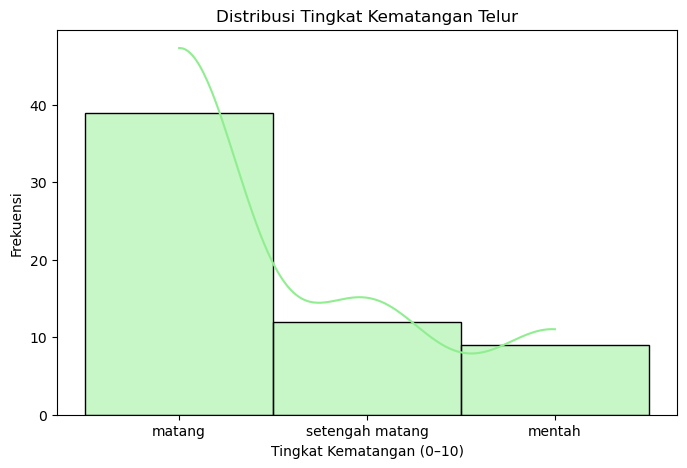

In [31]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data['doneness'], kde=True, color='lightgreen', bins=10)
plt.title('Distribusi Tingkat Kematangan Telur')
plt.xlabel('Tingkat Kematangan (0–10)')
plt.ylabel('Frekuensi')
plt.show()


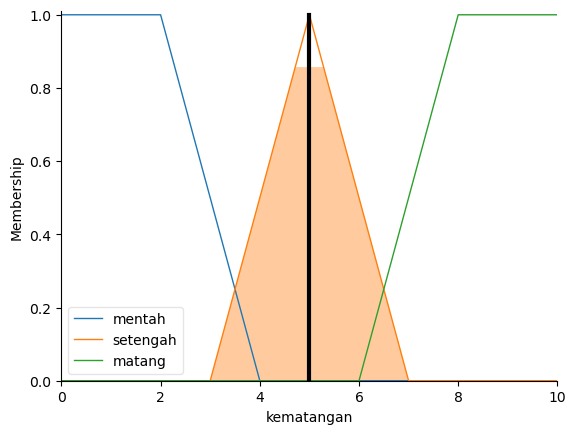

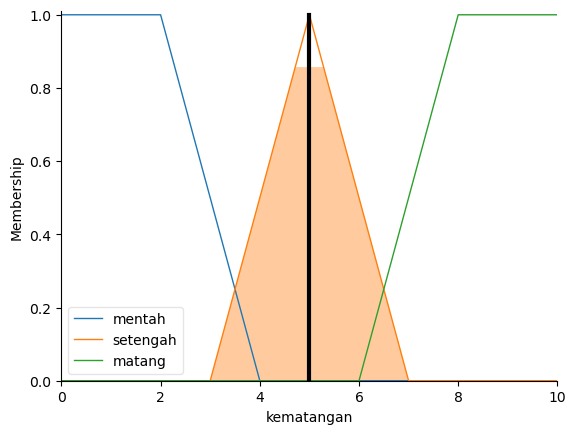

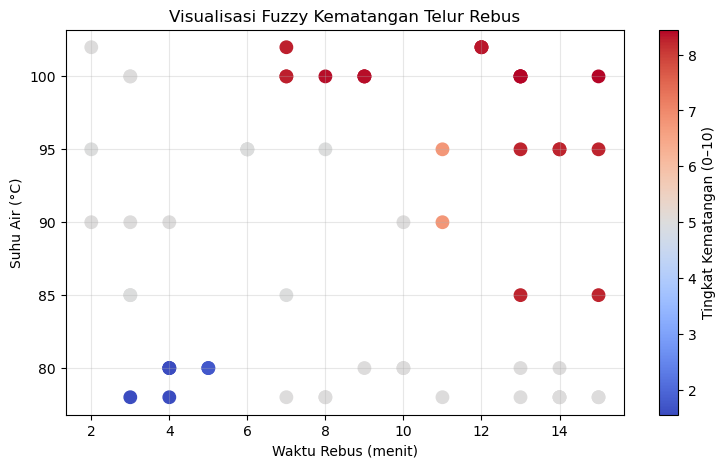

In [30]:
plt.figure(figsize=(9,5))
plt.scatter(data['time_min'], data['water_temp_c'],
            c=data['prediksi_kematangan'], cmap='coolwarm', s=80)
plt.colorbar(label='Tingkat Kematangan (0–10)')
plt.title('Visualisasi Fuzzy Kematangan Telur Rebus')
plt.xlabel('Waktu Rebus (menit)')
plt.ylabel('Suhu Air (°C)')
plt.grid(alpha=0.3)
plt.show()


In [33]:
import pkg_resources

# daftar library yang dipakai di tugasmu
packages = [
    "numpy",
    "pandas",
    "matplotlib",
    "seaborn",
    "scikit-fuzzy"
]

with open("requirements.txt", "w") as f:
    for p in packages:
        version = pkg_resources.get_distribution(p).version
        f.write(f"{p}=={version}\n")

print("✅ File requirements.txt berhasil dibuat di folder ini!")


C:\Users\USER\AppData\Local\Temp\ipykernel_2640\3965332138.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✅ File requirements.txt berhasil dibuat di folder ini!
